In [1]:
#importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

**Data Collection**

In [2]:
df = pd.read_csv('/content/Zoo.csv')
df

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
df1 = df.copy()

In [4]:
df1.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


<Axes: xlabel='type', ylabel='count'>

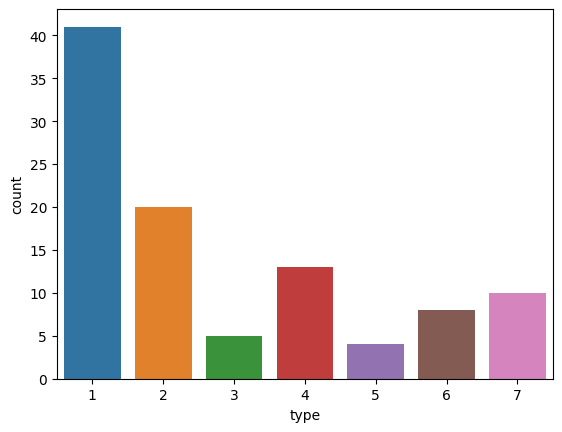

In [7]:
sns.countplot(data=df1,x='type')

As we can see in the above graph, highest number of animal present in zoo are of type 1

<Axes: >

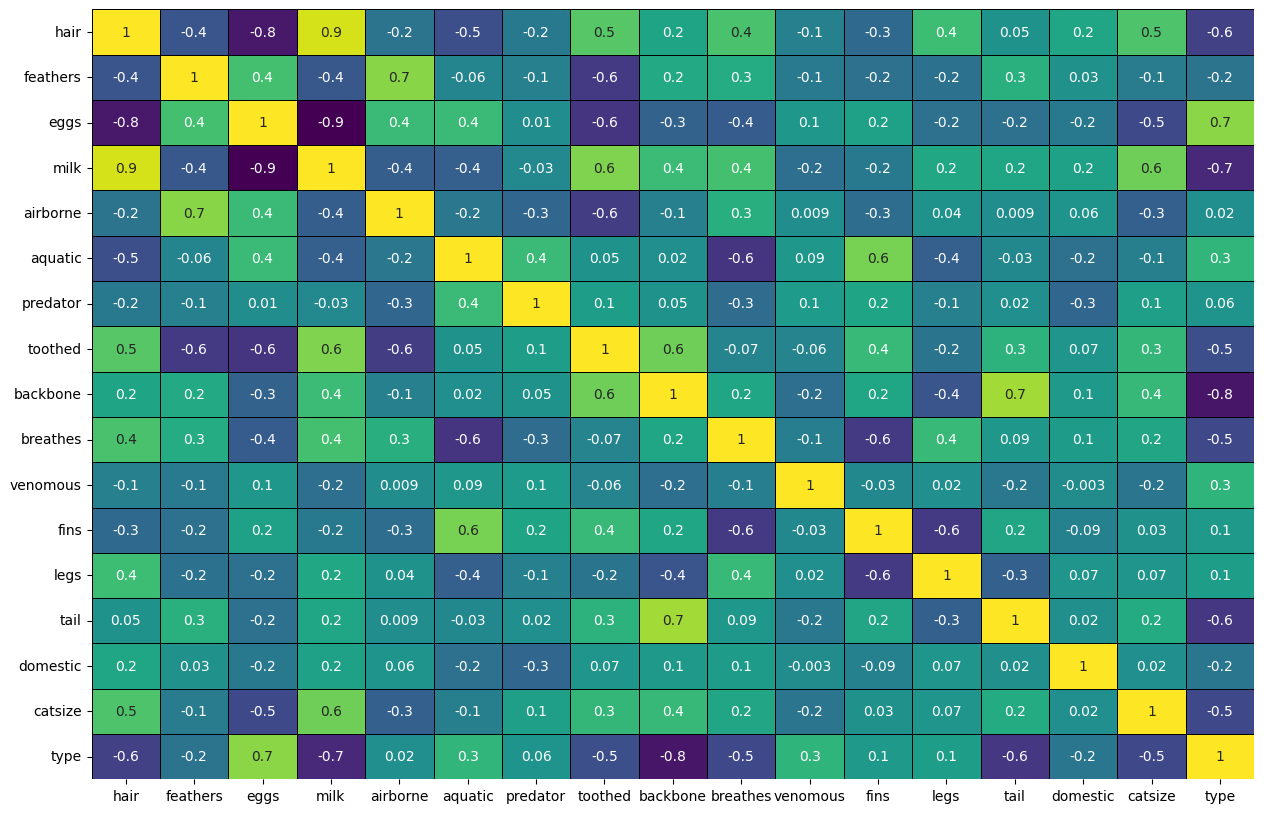

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df1.corr(),annot=True,fmt='.1g',cmap='viridis',cbar=False,linewidth=0.5,linecolor='black')

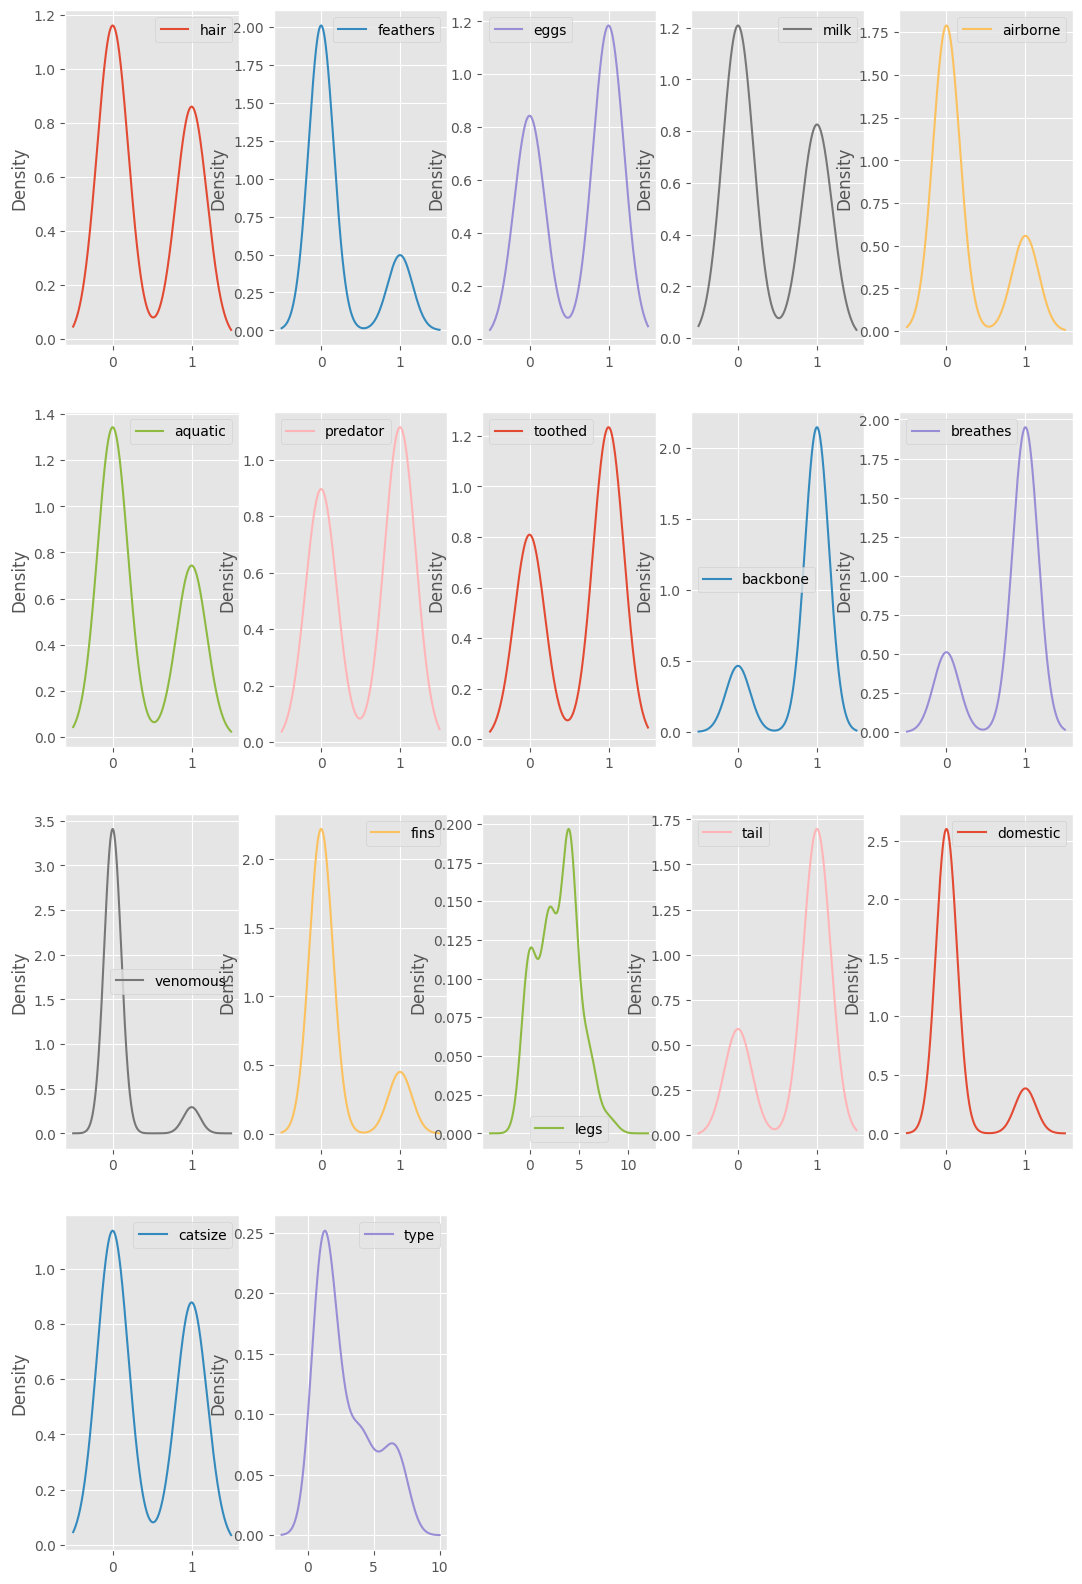

In [11]:
df1.plot(kind='density',subplots=True,layout=(4,5),figsize=(13,20),sharex=False,sharey=False)
plt.show()

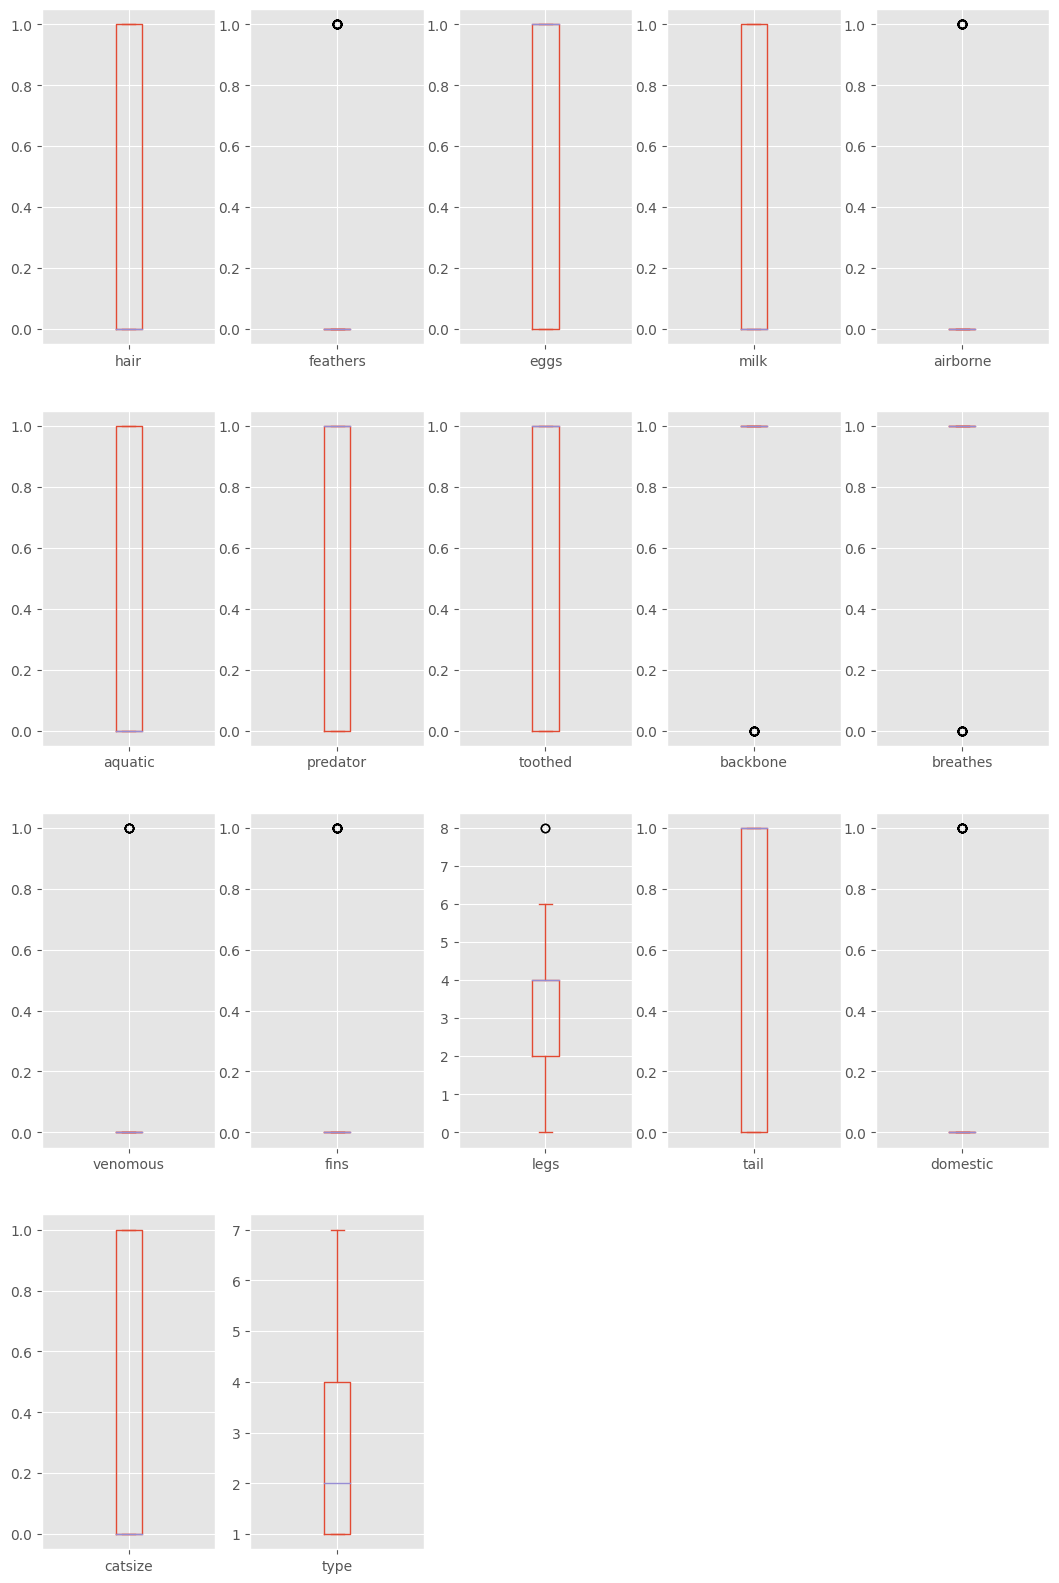

In [12]:
df1.plot(kind='box',subplots=True,layout=(4,5),figsize=(13,20),sharex=False,sharey=False)
plt.show()

**KNN**

Finding optimum no. of k

In [13]:
X = df1.iloc[:,1:17]
Y = df1.iloc[:,17]

In [14]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1,stratify=Y)

In [16]:
k_values = np.arange(1,25)
train_accuracy = []
test_accuracy = []

In [17]:
for i, k in enumerate(k_values):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,Y_train)
  train_accuracy.append(knn.score(X_train,Y_train))
  test_accuracy.append(knn.score(X_test,Y_test))

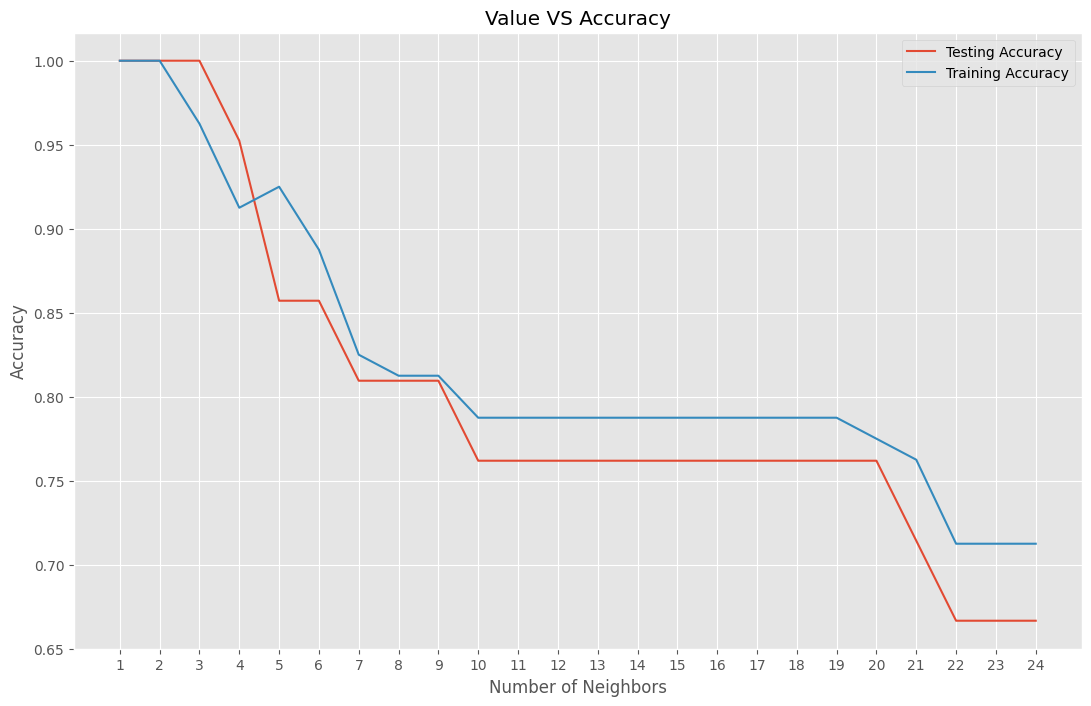

In [23]:
plt.figure(figsize=(13,8))
plt.plot(k_values, test_accuracy, label='Testing Accuracy')
plt.plot(k_values, train_accuracy, label='Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

Considering k value as 5

In [25]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [26]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
pred = knn.predict(X_test)

print('With k=5')
print('\n')
print(confusion_matrix(Y_test,pred))
print('\n')
print(classification_report(Y_test,pred))

With k=5


[[7 0 0 1 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 1 1]]


              precision    recall  f1-score   support

           1       1.00      0.88      0.93         8
           2       1.00      1.00      1.00         4
           3       0.00      0.00      0.00         1
           4       0.60      1.00      0.75         3
           5       1.00      1.00      1.00         1
           6       0.67      1.00      0.80         2
           7       1.00      0.50      0.67         2

    accuracy                           0.86        21
   macro avg       0.75      0.77      0.74        21
weighted avg       0.86      0.86      0.84        21



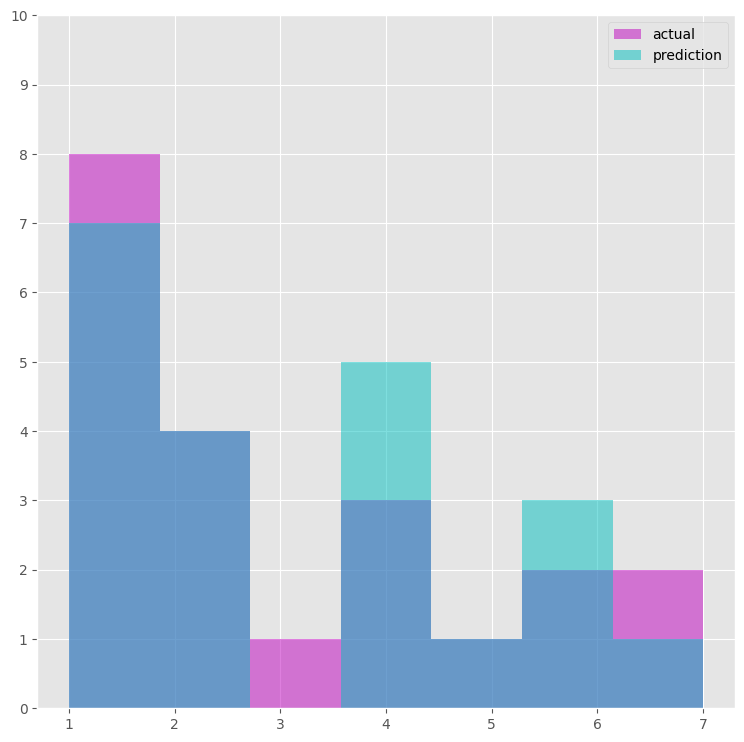

In [29]:
plt.rcParams['figure.figsize'] = (9,9)
_, ax = plt.subplots()
ax.hist(Y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()